In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import cm
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import sys
import os

sys.path.append("../../")
from common.constants import DATAFOLDER

In [2]:
uwind_datafile_path = os.path.join(DATAFOLDER.data_root_path, "nexra_data", "2020", "20200101", "00_Surface_wind_speed_(U).parquet.gzip")
vwind_datafile_path = os.path.join(DATAFOLDER.data_root_path, "nexra_data", "2020", "20200101", "00_Surface_wind_speed_(V).parquet.gzip")

uwind_df = pd.read_parquet(uwind_datafile_path)
vwind_df = pd.read_parquet(vwind_datafile_path)

uwind_df.head()

,0.5625,1.6875,2.8125,3.9375,5.0625,6.1875,7.3125,8.4375,9.5625,10.6875,...,349.3125,350.4375,351.5625,352.6875,353.8125,354.9375,356.0625,357.1875,358.3125,359.4375
-89.4375,-1.747488,-1.746401,-1.745307,-1.744205,-1.743097,-1.741982,-1.740861,-1.739734,-1.738602,-1.737465,...,-1.757832,-1.756846,-1.755849,-1.754839,-1.753819,-1.752788,-1.751747,-1.750696,-1.749635,-1.748566
-88.3125,-2.033062,-2.026344,-2.017362,-2.000824,-1.984344,-1.967928,-1.951582,-1.935313,-1.919127,-1.903030,...,-2.048318,-2.048692,-2.049130,-2.049632,-2.050198,-2.050827,-2.051520,-2.052275,-2.047005,-2.039950
-87.1875,-1.531767,-1.521095,-1.511234,-1.502185,-1.493954,-1.477863,-1.449358,-1.422050,-1.395952,-1.371072,...,-1.702718,-1.679644,-1.657239,-1.635512,-1.614470,-1.597117,-1.582464,-1.568598,-1.555522,-1.543244
-86.0625,-0.431273,-0.425395,-0.421206,-0.418708,-0.417901,-0.418787,-0.407735,-0.367214,-0.327949,-0.284498,...,-0.626152,-0.595851,-0.559132,-0.524211,-0.501844,-0.485901,-0.471623,-0.459017,-0.448088,-0.438838
-84.9375,0.407463,0.420806,0.442263,0.462794,0.482390,0.501045,0.518750,0.535501,0.551289,0.566109,...,0.427666,0.425322,0.422190,0.418271,0.413565,0.408075,0.401802,0.394749,0.386920,0.395451


In [3]:
vwind_df.head()

,0.5625,1.6875,2.8125,3.9375,5.0625,6.1875,7.3125,8.4375,9.5625,10.6875,...,349.3125,350.4375,351.5625,352.6875,353.8125,354.9375,356.0625,357.1875,358.3125,359.4375
-89.4375,-0.169821,-0.190323,-0.210860,-0.231425,-0.252009,-0.272605,-0.293204,-0.313799,-0.334381,-0.354944,...,0.031533,0.011814,-0.008017,-0.027955,-0.047990,-0.068115,-0.088323,-0.108605,-0.128954,-0.149362
-88.3125,-0.018572,-0.040229,-0.066567,-0.108382,-0.150134,-0.191807,-0.233384,-0.274850,-0.316189,-0.357385,...,0.157689,0.141351,0.125145,0.109079,0.093156,0.077385,0.061771,0.046320,0.025584,0.003368
-87.1875,-0.361831,-0.398289,-0.434632,-0.470847,-0.506920,-0.549134,-0.600772,-0.651957,-0.702667,-0.752885,...,-0.162667,-0.162262,-0.161188,-0.159443,-0.157029,-0.178318,-0.215137,-0.251912,-0.288629,-0.325273
-86.0625,-0.641452,-0.671099,-0.700208,-0.728768,-0.756767,-0.784196,-0.825699,-0.900127,-0.974419,-1.046389,...,-0.486978,-0.446662,-0.439462,-0.432228,-0.452913,-0.485545,-0.517709,-0.549394,-0.580588,-0.611277
-84.9375,-0.447735,-0.510341,-0.626009,-0.741974,-0.858189,-0.974613,-1.091199,-1.207904,-1.324683,-1.441492,...,-0.623839,-0.589810,-0.556256,-0.523189,-0.490622,-0.458566,-0.427036,-0.396041,-0.365595,-0.398585


In [11]:
wind_speed = np.stack((uwind_df.to_numpy(), vwind_df.to_numpy()), axis=-1)
print(wind_speed.shape)
wind_speed

(160, 320, 2)


array([[[-1.74748766e+00, -1.69820756e-01],
        [-1.74640119e+00, -1.90322906e-01],
        [-1.74530697e+00, -2.10860312e-01],
        ...,
        [-1.75069594e+00, -1.08604886e-01],
        [-1.74963546e+00, -1.28953874e-01],
        [-1.74856579e+00, -1.49361789e-01]],

       [[-2.03306150e+00, -1.85720138e-02],
        [-2.02634358e+00, -4.02290449e-02],
        [-2.01736164e+00, -6.65671080e-02],
        ...,
        [-2.05227542e+00,  4.63195555e-02],
        [-2.04700518e+00,  2.55838521e-02],
        [-2.03994966e+00,  3.36843519e-03]],

       [[-1.53176677e+00, -3.61831129e-01],
        [-1.52109528e+00, -3.98288786e-01],
        [-1.51123357e+00, -4.34632033e-01],
        ...,
        [-1.56859756e+00, -2.51911968e-01],
        [-1.55552244e+00, -2.88628668e-01],
        [-1.54324389e+00, -3.25273067e-01]],

       ...,

       [[-1.79460853e-01, -3.24297094e+00],
        [-2.99975872e-01, -3.19794655e+00],
        [-4.21555221e-01, -3.15184140e+00],
        ...,
     

In [29]:
def abs_val(a):
    return np.sqrt(np.square(a).sum())

abs_wind_arr = np.apply_along_axis(func1d=abs_val, axis=-1, arr=wind_speed)
print(abs_wind_arr.shape)
abs_wind_arr

abs_wind_df = pd.DataFrame(data=abs_wind_arr, index=uwind_df.index, columns=uwind_df.columns)
abs_wind_df.head()

(160, 320)


,0.5625,1.6875,2.8125,3.9375,5.0625,6.1875,7.3125,8.4375,9.5625,10.6875,...,349.3125,350.4375,351.5625,352.6875,353.8125,354.9375,356.0625,357.1875,358.3125,359.4375
-89.4375,1.755720,1.756741,1.757998,1.759491,1.761220,1.763183,1.765379,1.767807,1.770465,1.773350,...,1.758115,1.756886,1.755867,1.755062,1.754476,1.754111,1.753972,1.754061,1.754381,1.754933
-88.3125,2.033146,2.026743,2.018460,2.003757,1.990015,1.977253,1.965487,1.954733,1.945000,1.936297,...,2.054379,2.053562,2.052948,2.052532,2.052313,2.052287,2.052449,2.052798,2.047165,2.039953
-87.1875,1.573922,1.572376,1.572492,1.574248,1.577614,1.576587,1.568938,1.564377,1.562825,1.564185,...,1.710471,1.687464,1.665059,1.643265,1.622088,1.607041,1.597021,1.588697,1.582074,1.577151
-86.0625,0.772953,0.794566,0.817133,0.840487,0.864487,0.889014,0.920884,0.972149,1.028126,1.084375,...,0.793230,0.744678,0.711165,0.679425,0.676001,0.686916,0.700322,0.715913,0.733392,0.752489
-84.9375,0.605386,0.661457,0.766475,0.874473,0.984474,1.095863,1.208229,1.321284,1.434819,1.548670,...,0.756355,0.727170,0.698331,0.669834,0.641674,0.613847,0.586348,0.559174,0.532322,0.561473


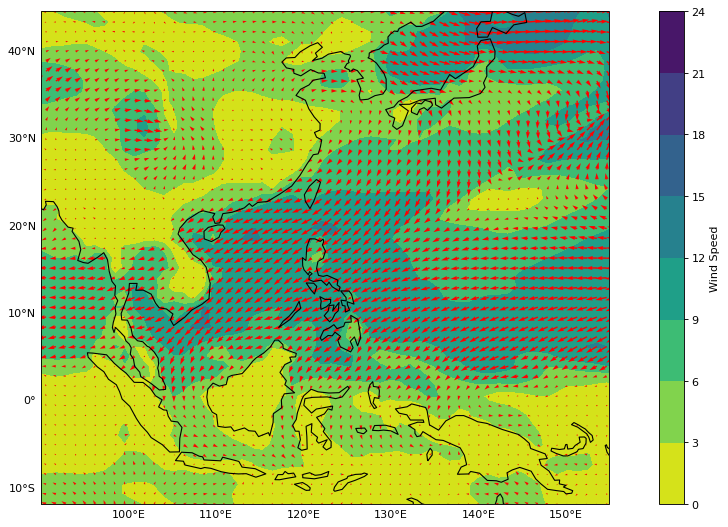

In [51]:
grid_mesh = np.meshgrid(uwind_df.columns.astype(np.float32).to_numpy(), uwind_df.index.astype(np.float32).to_numpy())
x_grid, y_grid = grid_mesh[0], grid_mesh[1]

plt.figure(figsize=(16, 8), dpi=80)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([90, 155, -10, 40])
ax.add_feature(cfeature.COASTLINE)
gl = ax.gridlines(draw_labels=True, alpha=0)
gl.right_labels = False
gl.top_labels = False

# clevs = [i for i in range(0, 101, 5)]
cmap = cm.viridis_r
# norm = mcolors.BoundaryNorm(clevs, cmap.N)
cs = ax.contourf(x_grid, y_grid, abs_wind_df, cmap=cmap)
cbar = plt.colorbar(cs, orientation="vertical")

# Wind arrow
ax.quiver(
    uwind_df.columns.astype(np.float32).to_numpy(),
    uwind_df.index.to_numpy(),
    uwind_df.to_numpy(),
    vwind_df.to_numpy(),
    color="red",
    scale=550,
)

# Fig Info
cbar.set_label("Wind Speed (m/s)")

plt.show()
plt.close()

In [4]:
data_folder = "/home/akira/Desktop/p-poteka/data/nexra_data/2020/20200304"

import os
from itertools import groupby

filenames = os.listdir(data_folder)

def get_hour(val):
    return int(val[:2])

sorted_filenames = sorted(filenames, key=get_hour)
grouped_filenames = [list(it) for _, it in groupby(sorted_filenames, get_hour)]
grouped_filenames

[['00_Time_accumulated_rainfall_(1hour).parquet.gzip',
  '00_Cumulative_water_vapor_amount.parquet.gzip',
  '00_Surface_wind_speed_(U).parquet.gzip',
  '00_Surface_wind_speed_(V).parquet.gzip',
  '00_Sea_level_correction_pressure.parquet.gzip'],
 ['06_Surface_wind_speed_(V).parquet.gzip',
  '06_Cumulative_water_vapor_amount.parquet.gzip',
  '06_Time_accumulated_rainfall_(1hour).parquet.gzip',
  '06_Sea_level_correction_pressure.parquet.gzip',
  '06_Surface_wind_speed_(U).parquet.gzip'],
 ['12_Sea_level_correction_pressure.parquet.gzip',
  '12_Surface_wind_speed_(U).parquet.gzip',
  '12_Cumulative_water_vapor_amount.parquet.gzip',
  '12_Surface_wind_speed_(V).parquet.gzip',
  '12_Time_accumulated_rainfall_(1hour).parquet.gzip'],
 ['18_Cumulative_water_vapor_amount.parquet.gzip',
  '18_Surface_wind_speed_(V).parquet.gzip',
  '18_Surface_wind_speed_(U).parquet.gzip',
  '18_Sea_level_correction_pressure.parquet.gzip',
  '18_Time_accumulated_rainfall_(1hour).parquet.gzip']]